#### CH06 Learning Best Practice for Model Evaluation & Hyperparameter tuning

#### 1. Streamlining workflows with pipelines


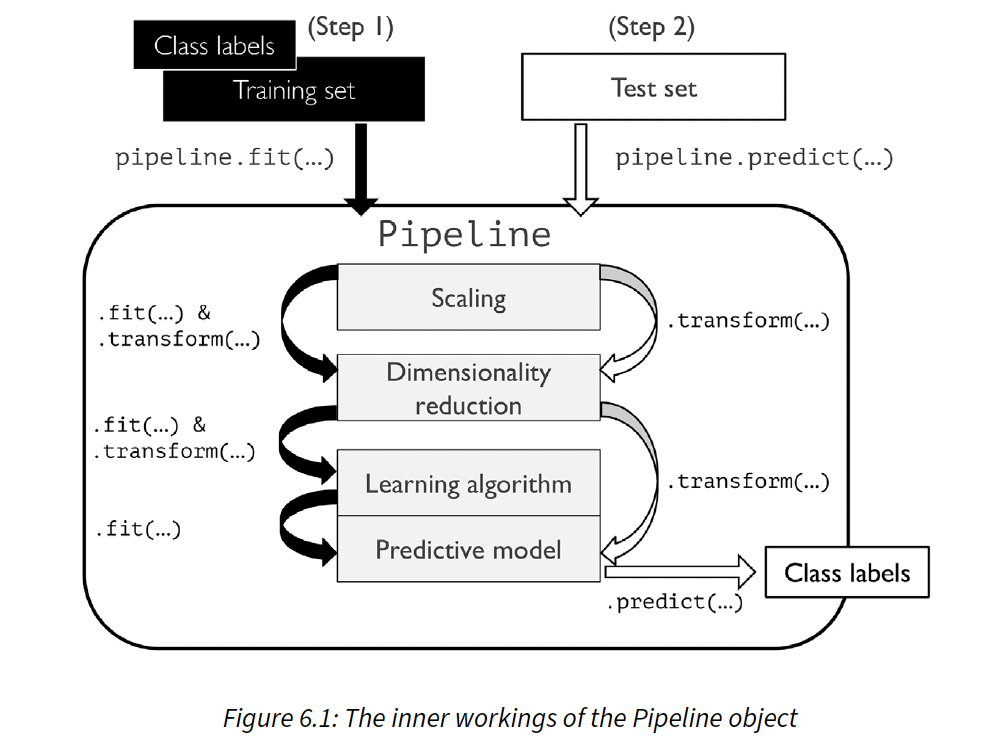

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# 1. features to numpy array X.
# 2. Using label encoder, transform class labels into integers

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

# 2.1. classes to encode
le.classes_

# 2.2. transform method of the fiitted labelEncoder
le.transform(['M', 'B'])

# 3. split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


array(['B', 'M'], dtype=object)

array([1, 0])

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression()
)
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Accuracy : {test_acc: .3f}')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

Accuracy :  0.956


#### 2. Using k-fold CV to assess model performance

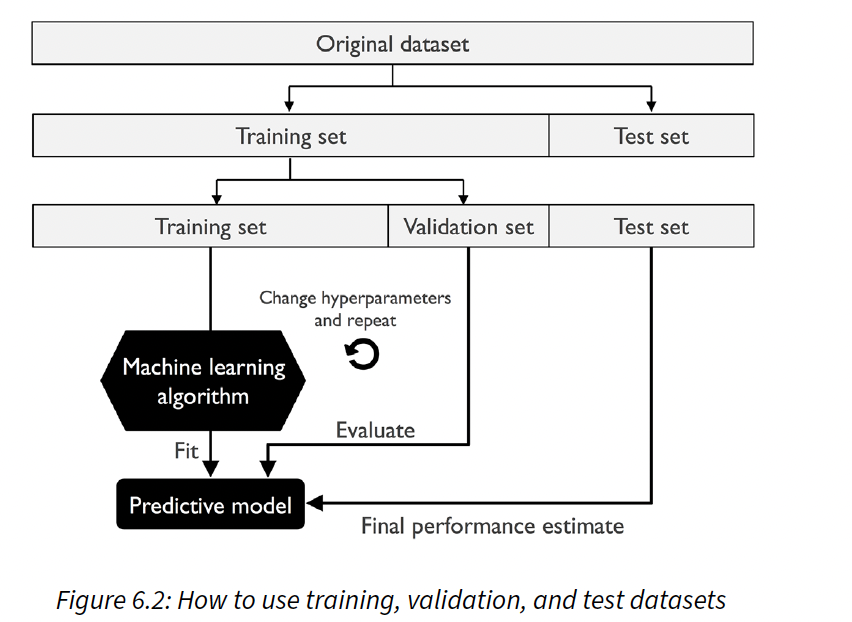

In [ ]:
# 1. Interested in tuning and comapring diffferent parameter settings.
# 2. Select optimal values of tuning parameters. (Hyperparameter)
# 3. However if we reuse the same dataset over and over again during
# model selection, it will become part of our training data, model will be
# likely to overfit.
# 4. To split the dataset 3 parts - train, validation, test
# 5. We use validation dataset to repeatedly evaluate the perfromance of model
# after training using different hyperparameter values
# 6. Disadv: performance estimate may be very sensitive to how we partition
# dataset into training and validation subsets
# --------------


